<a href="https://colab.research.google.com/github/NolanTrem/TCGA-CNN/blob/main/CompGenPythonPipelines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trascriptome data 

In [1]:
#!unzip /content/drive/MyDrive/CompGenomics/transcriptome/transcriptome.zip

In [2]:
import os
import io
import gzip
import pandas as pd
import numpy as np

dfs = {}

for filename in os.listdir():
  if filename != 'sample_data' and filename != 'transcriptome.zip' and filename != '.config' and filename != 'drive' and filename != 'merged_df.txt':
    for insidefile in os.listdir(filename):
      if insidefile != 'logs':
        filepath = os.path.join(filename, insidefile)
        with gzip.open(filepath, 'rb') as f:
            file_content = f.read().decode('utf-8')
            # Extract the cell type from the file name
            cell_type = insidefile[:-15]
            # Read in the data from the file as a DataFrame
            df = pd.read_csv(io.StringIO(file_content), sep='\t', index_col=0, names=[cell_type])
            # Add the DataFrame to the dictionary
            dfs[cell_type] = df

# Concatenate the DataFrames along the columns (axis=1)
combined_df = pd.concat(dfs.values(), axis=1)

Remove outliers

In [3]:
merged_df = pd.read_csv('merged_df.txt', sep='\t', header=0)

In [4]:
combined_df = combined_df.T

gene_id = combined_df.columns
cells = combined_df.index
labels = []

for cell in cells:
  label = merged_df[merged_df['transcriptome_filename'] == (cell+'.FPKM-UQ.txt.gz')].tumor.values[0]
  if label == 'Primary Tumor':
    labels.append(1)
  elif label == 'Solid Tissue Normal':
    labels.append(0)
  else:
    labels.append(-1)

combined_df['label'] = labels

combined_df = combined_df.drop(combined_df[combined_df['label'] == -1].index)

combined_df.head()

,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,...,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3,label
5774022a-7bf2-4fdd-a4a5-f9aa33c2174d,0.000000,0.000000,112621.181642,0.0,74324.692128,238739.544662,0.0,329.053754,3.190455e+06,5472.644984,...,0.000000,0.0,797.318459,0.000000,303118.482953,29544.417310,0.0,18922.280233,0.0,0
378d4b61-b44c-4aed-86e9-be63913aaf66,1555.153520,0.000000,77125.660324,0.0,99470.493119,245802.179966,0.0,3567.358619,2.602698e+06,5251.080410,...,468.558879,0.0,834.587301,0.000000,272950.743461,20956.030383,0.0,28624.837052,0.0,0
60cc2580-b21c-4526-ab37-e5dadb4fa9b7,1393.470892,145.011384,46427.498247,0.0,85337.992040,188695.900693,0.0,760.540764,2.861677e+06,9624.166667,...,629.767240,0.0,2243.456538,580.612872,182753.612249,4785.482541,0.0,11213.768246,0.0,0
65393588-3484-4942-80d5-fb3a43cbc543,756.012187,262.247729,37016.177092,0.0,73244.151255,278484.301888,0.0,161.461159,3.387782e+06,2784.791973,...,85.418309,0.0,2434.324956,1260.020312,255175.071952,1780.327206,0.0,20675.386734,0.0,1
bd77428f-6994-415d-ad14-a6e7676b343a,666.880068,1758.102818,51834.383972,0.0,80976.403132,209387.380876,0.0,348.150624,1.923951e+06,3684.706992,...,8137.549910,0.0,1073.661788,0.000000,257780.601089,3402.599796,0.0,20419.361324,0.0,0


In [5]:
from sklearn.model_selection import train_test_split

X = combined_df.drop('label', axis=1)
y = combined_df['label']

# Normalize expression
# total_fragments = X.sum(axis=0)
# scaling_factor = total_fragments / 1e6
# X_norm = X.div(scaling_factor+0.0001, axis=1)
# X_norm = np.log2(X_norm + 1)

X_dev, X_test, y_dev, y_test = train_test_split(X, y, stratify=y, test_size=0.2, shuffle=True, random_state=42)

#X_dev_stand = ss.fit_transform(X_dev)
#X_test_stand = ss.transform(X_test)

In [61]:
y.value_counts()

0    133
1    109
Name: label, dtype: int64

# Simple feed forward neural network

In [43]:
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

fpkm_scaler = Normalizer(norm='l2').fit(X_dev)
X_dev_fpkm = fpkm_scaler.transform(X_dev)
X_test_fpkm = fpkm_scaler.transform(X_test)

In [57]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from imblearn.over_sampling import SMOTE

# Define output shape
num_classes = 2

# Define input shape
input_shape = (X_dev_fpkm.shape[1],)

# Define the model
ffnn = Sequential()

# Add first hidden layer with 64 neurons and ReLU activation
#ffnn.add(Dense(128, activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.01)))

# Add second hidden layer with 32 neurons and ReLU activation
#ffnn.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Add output layer with 10 neurons and softmax activation
#ffnn.add(Dense(1, activation='sigmoid'))
smote = SMOTE(random_state=42)
X_dev_smote, y_dev_smote = smote.fit_resample(X_dev_fpkm, y_dev)
ffnn.add(Dense(7000, activation='relu', input_shape=input_shape))
ffnn.add(Dropout(0.2))
ffnn.add(Dense(7000, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
ffnn.add(Dense(1, activation='sigmoid'))

ffnn.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 7000)              423388000 
                                                                 
 dropout_13 (Dropout)        (None, 7000)              0         
                                                                 
 dense_28 (Dense)            (None, 7000)              49007000  
                                                                 
 dense_29 (Dense)            (None, 1)                 7001      
                                                                 
Total params: 472,402,001
Trainable params: 472,402,001
Non-trainable params: 0
_________________________________________________________________


In [58]:
from keras.optimizers import Adam

# Compile the model with categorical cross-entropy loss and Adam optimizer
ffnn.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history_ffnn = ffnn.fit(X_dev_smote, y_dev_smote, batch_size=32, epochs=15, validation_split=0.2)

Epoch 1/15
6/6 [==============================] - 1s 62ms/step - loss: 52.2030 - accuracy: 0.6036 - val_loss: 26.2944 - val_accuracy: 0.8605
Epoch 2/15
6/6 [==============================] - 0s 29ms/step - loss: 17.8876 - accuracy: 0.8047 - val_loss: 7.2279 - val_accuracy: 0.9070
Epoch 3/15
6/6 [==============================] - 0s 28ms/step - loss: 4.5559 - accuracy: 0.9172 - val_loss: 1.9041 - val_accuracy: 0.9302
Epoch 4/15
6/6 [==============================] - 0s 28ms/step - loss: 1.5065 - accuracy: 0.9941 - val_loss: 1.4314 - val_accuracy: 0.9767
Epoch 5/15
6/6 [==============================] - 0s 27ms/step - loss: 1.4362 - accuracy: 1.0000 - val_loss: 1.4640 - val_accuracy: 0.9767
Epoch 6/15
6/6 [==============================] - 0s 28ms/step - loss: 1.2918 - accuracy: 1.0000 - val_loss: 1.0859 - val_accuracy: 0.9535
Epoch 7/15
6/6 [==============================] - 0s 29ms/step - loss: 0.7760 - accuracy: 1.0000 - val_loss: 0.6930 - val_accuracy: 0.9302
Epoch 8/15
6/6 [========

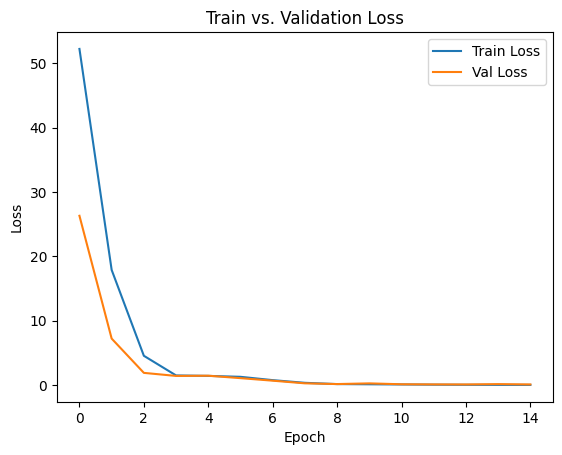

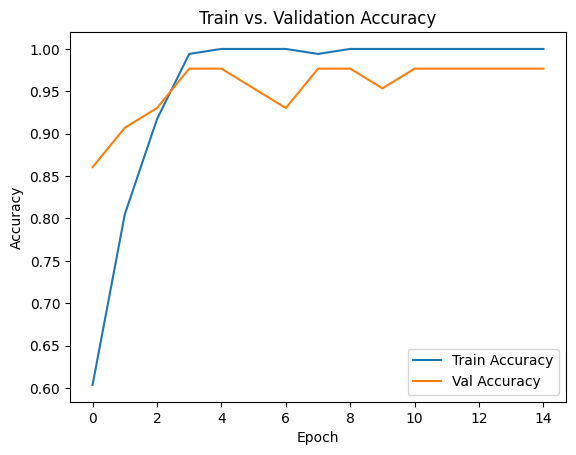

In [59]:
import matplotlib.pyplot as plt
# a. train vs validation loss over each epoch
plt.plot(history_ffnn.history['loss'], label='Train Loss')
plt.plot(history_ffnn.history['val_loss'], label='Val Loss')
plt.title('Train vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# b. train vs validation accuracy over each epoch
plt.plot(history_ffnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_ffnn.history['val_accuracy'], label='Val Accuracy')
plt.title('Train vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [60]:
test_loss, test_accuracy = ffnn.evaluate(X_test_fpkm, y_test)
print("\n=====Results=====")
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)
#0.9795918367346939
#Test Loss:  84987.5625
#Test Accuracy:  0.9795918464660645

2/2 [==============================] - 0s 8ms/step - loss: 0.1449 - accuracy: 0.9796

=====Results=====
Test Loss:  0.14485248923301697
Test Accuracy:  0.9795918464660645


In [62]:
print("Train loss: ", history_ffnn.history['loss'])
print("Val loss: ", history_ffnn.history['val_loss'])
print("Train acc: ", history_ffnn.history['accuracy'])
print("Val acc: ", history_ffnn.history['val_accuracy'])

Train loss:  [52.20301055908203, 17.887584686279297, 4.555914878845215, 1.506476640701294, 1.436240792274475, 1.2918148040771484, 0.7760427594184875, 0.36085715889930725, 0.16292867064476013, 0.13141973316669464, 0.10311446338891983, 0.0694306343793869, 0.049300666898489, 0.03867410123348236, 0.03349124640226364]
Val loss:  [26.294435501098633, 7.227936267852783, 1.9040664434432983, 1.4313799142837524, 1.4640474319458008, 1.0858725309371948, 0.6930065155029297, 0.28122276067733765, 0.16639383137226105, 0.2730400562286377, 0.13395017385482788, 0.11348406225442886, 0.10739006847143173, 0.15769563615322113, 0.10851164907217026]
Train acc:  [0.6035503149032593, 0.8047337532043457, 0.9171597361564636, 0.9940828680992126, 1.0, 1.0, 1.0, 0.9940828680992126, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Val acc:  [0.8604651093482971, 0.9069767594337463, 0.930232584476471, 0.9767441749572754, 0.9767441749572754, 0.9534883499145508, 0.930232584476471, 0.9767441749572754, 0.9767441749572754, 0.9534883499145

In [35]:
from sklearn.metrics import confusion_matrix
y_pred = ffnn.predict(X_test)
confusion_matrix(y_test, y_pred)

2/2 [==============================] - 0s 5ms/step


array([[26,  1],
       [ 0, 22]])

# SCOPE

In [5]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.ensemble import VotingClassifier

In [7]:
# Preprocess data
fpkm_scaler = Normalizer().fit(X_dev)
X_train_rpkm = fpkm_scaler.transform(X_dev)
X_test_rpkm = fpkm_scaler.transform(X_test)

In [8]:
import scikeras
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from scikeras.wrappers import KerasClassifier

# Define models
def create_model_None17k():
    nn = Sequential()
    nn.add(Dense(7000, activation='relu', input_shape=(X_dev.shape[1],)))
    nn.add(Dense(1, activation='sigmoid'))
    nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return nn

def create_model_None17kDropout():
    nn = Sequential()
    nn.add(Dense(7000, activation='relu', input_shape=(X_dev.shape[1],)))
    nn.add(Dropout(0.1))
    nn.add(Dense(7000, activation='relu'))
    nn.add(Dense(1, activation='sigmoid'))
    nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return nn

def create_model_SmoteNone17k():
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_dev, y_dev)
    nn = Sequential()
    nn.add(Dense(7000, activation='relu', input_shape=(X_train_smote.shape[1],)))
    nn.add(Dense(1, activation='sigmoid'))
    nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return nn

def create_model_Rm500():
    rank_scaler = Normalizer().fit(X_dev)
    X_train_rank = rank_scaler.transform(X_dev)
    X_test_rank = rank_scaler.transform(X_test)
    minmax_scaler = MinMaxScaler(feature_range=(0, 1)).fit(X_train_rank)
    X_train_scaled = minmax_scaler.transform(X_train_rank)
    X_test_scaled = minmax_scaler.transform(X_test_rank)
    nn = Sequential()
    nn.add(Dense(500, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    nn.add(Dense(1, activation='sigmoid'))
    nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return nn

def create_model_Rm500Dropout():
    rank_scaler = Normalizer().fit(X_dev)
    X_train_rank = rank_scaler.transform(X_dev)
    X_test_rank = rank_scaler.transform(X_test)
    minmax_scaler = MinMaxScaler(feature_range=(0, 1)).fit(X_train_rank)
    X_train_scaled = minmax_scaler.transform(X_train_rank)
    X_test_scaled = minmax_scaler.transform(X_test_rank)
    nn = Sequential()
    nn.add(Dense(500, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    nn.add(Dropout(0.1))
    nn.add(Dense(500, activation='relu'))
    nn.add(Dense(1, activation='sigmoid'))
    nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return nn

# Wrap models into a voting classifier
estimators = [
    ('None17k', KerasClassifier(build_fn=create_model_None17k, epochs=10, batch_size=32, verbose=1)),
    ('None17kDropout', KerasClassifier(build_fn=create_model_None17kDropout, epochs=10, batch_size=32, verbose=1)),
    ('SmoteNone17k', KerasClassifier(build_fn=create_model_SmoteNone17k, epochs=10, batch_size=32, verbose=1)),
    ('Rm500', KerasClassifier(build_fn=create_model_Rm500, epochs=10, batch_size=32, verbose=1)),
    ('Rm500Dropout', KerasClassifier(build_fn=create_model_Rm500Dropout, epochs=10, batch_size=32, verbose=1))
]
ensemble = VotingClassifier(estimators)

# Fit and evaluate the ensemble classifier on the data
history_ensemble = ensemble.fit(X_dev, y_dev)

# Evaluate the ensemble classifier on the test data
print("accuracy: ", ensemble.score(X_test, y_test))

/usr/local/lib/python3.9/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
4/4 [==============================] - 3s 21ms/step - loss: 0.6488 - accuracy: 0.6166
Epoch 2/10
4/4 [==============================] - 0s 19ms/step - loss: 0.5320 - accuracy: 0.7150
Epoch 3/10
4/4 [==============================] - 0s 19ms/step - loss: 0.4169 - accuracy: 0.8705
Epoch 4/10
4/4 [==============================] - 0s 19ms/step - loss: 0.3569 - accuracy: 0.9223
Epoch 5/10
4/4 [==============================] - 0s 19ms/step - loss: 0.2645 - accuracy: 0.9482
Epoch 6/10
4/4 [==============================] - 0s 19ms/step - loss: 0.1979 - accuracy: 0.9326
Epoch 7/10
4/4 [==============================] - 0s 19ms/step - loss: 0.1631 - accuracy: 0.9430
Epoch 8/10
4/4 [==============================] - 0s 19ms/step - loss: 0.1350 - accuracy: 0.9482
Epoch 9/10
4/4 [==============================] - 0s 19ms/step - loss: 0.1048 - accuracy: 0.9793
Epoch 10/10
4/4 [==============================] - 0s 19ms/step - loss: 0.0832 - accuracy: 0.9793


/usr/local/lib/python3.9/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
4/4 [==============================] - 2s 22ms/step - loss: 0.6953 - accuracy: 0.4508
Epoch 2/10
4/4 [==============================] - 0s 21ms/step - loss: 0.6138 - accuracy: 0.5959
Epoch 3/10
4/4 [==============================] - 0s 21ms/step - loss: 0.3163 - accuracy: 0.8912
Epoch 4/10
4/4 [==============================] - 0s 21ms/step - loss: 0.1332 - accuracy: 0.9223
Epoch 5/10
4/4 [==============================] - 0s 21ms/step - loss: 0.0514 - accuracy: 0.9948
Epoch 6/10
4/4 [==============================] - 0s 21ms/step - loss: 0.1078 - accuracy: 0.9585
Epoch 7/10
4/4 [==============================] - 0s 21ms/step - loss: 0.0181 - accuracy: 0.9896
Epoch 8/10
4/4 [==============================] - 0s 21ms/step - loss: 0.1026 - accuracy: 0.9741
Epoch 9/10
4/4 [==============================] - 0s 21ms/step - loss: 0.0237 - accuracy: 0.9845
Epoch 10/10
4/4 [==============================] - 0s 20ms/step - loss: 0.0203 - accuracy: 0.9896


/usr/local/lib/python3.9/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
4/4 [==============================] - 1s 20ms/step - loss: 0.6463 - accuracy: 0.5855
Epoch 2/10
4/4 [==============================] - 0s 20ms/step - loss: 0.5311 - accuracy: 0.7047
Epoch 3/10
4/4 [==============================] - 0s 19ms/step - loss: 0.4432 - accuracy: 0.7513
Epoch 4/10
4/4 [==============================] - 0s 20ms/step - loss: 0.3065 - accuracy: 0.8964
Epoch 5/10
4/4 [==============================] - 0s 19ms/step - loss: 0.2649 - accuracy: 0.9223
Epoch 6/10
4/4 [==============================] - 0s 19ms/step - loss: 0.2046 - accuracy: 0.9275
Epoch 7/10
4/4 [==============================] - 0s 20ms/step - loss: 0.1950 - accuracy: 0.9119
Epoch 8/10
4/4 [==============================] - 0s 19ms/step - loss: 0.1854 - accuracy: 0.9119
Epoch 9/10
4/4 [==============================] - 0s 19ms/step - loss: 0.1261 - accuracy: 0.9430
Epoch 10/10
4/4 [==============================] - 0s 19ms/step - loss: 0.1101 - accuracy: 0.9637


/usr/local/lib/python3.9/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
4/4 [==============================] - 1s 7ms/step - loss: 0.6839 - accuracy: 0.5337
Epoch 2/10
4/4 [==============================] - 0s 7ms/step - loss: 0.6288 - accuracy: 0.8238
Epoch 3/10
4/4 [==============================] - 0s 7ms/step - loss: 0.5854 - accuracy: 0.7927
Epoch 4/10
4/4 [==============================] - 0s 7ms/step - loss: 0.5292 - accuracy: 0.9119
Epoch 5/10
4/4 [==============================] - 0s 6ms/step - loss: 0.4798 - accuracy: 0.8964
Epoch 6/10
4/4 [==============================] - 0s 7ms/step - loss: 0.4313 - accuracy: 0.8964
Epoch 7/10
4/4 [==============================] - 0s 7ms/step - loss: 0.3978 - accuracy: 0.9119
Epoch 8/10
4/4 [==============================] - 0s 7ms/step - loss: 0.3587 - accuracy: 0.9016
Epoch 9/10
4/4 [==============================] - 0s 6ms/step - loss: 0.3261 - accuracy: 0.8912
Epoch 10/10
4/4 [==============================] - 0s 6ms/step - loss: 0.3008 - accuracy: 0.8860


/usr/local/lib/python3.9/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
4/4 [==============================] - 1s 7ms/step - loss: 0.6799 - accuracy: 0.6788
Epoch 2/10
4/4 [==============================] - 0s 7ms/step - loss: 0.6249 - accuracy: 0.7979
Epoch 3/10
4/4 [==============================] - 0s 7ms/step - loss: 0.5279 - accuracy: 0.8497
Epoch 4/10
4/4 [==============================] - 0s 7ms/step - loss: 0.4238 - accuracy: 0.9067
Epoch 5/10
4/4 [==============================] - 0s 7ms/step - loss: 0.3855 - accuracy: 0.9016
Epoch 6/10
4/4 [==============================] - 0s 7ms/step - loss: 0.2545 - accuracy: 0.8964
Epoch 7/10
4/4 [==============================] - 0s 8ms/step - loss: 0.3067 - accuracy: 0.8549
Epoch 8/10
4/4 [==============================] - 0s 7ms/step - loss: 0.1856 - accuracy: 0.9171
Epoch 9/10
4/4 [==============================] - 0s 7ms/step - loss: 0.1473 - accuracy: 0.9534
Epoch 10/10
1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 61ms/step
accuracy:  0.9795918367346939


In [9]:
from sklearn.metrics import log_loss, accuracy_score

y_pred = ensemble.predict(X_test)
test_loss = log_loss(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Loss: ", test_loss)

1/1 [==============================] - 0s 26ms/step
Accuracy: 0.9795918367346939
Loss:  0.7355847630432074


In [13]:
from sklearn.metrics import log_loss, accuracy_score


y_pred = ensemble.predict(X_test)
test_loss = log_loss(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Loss: ", test_loss)

Accuracy: 0.9795918367346939
Loss:  0.7355847630432074


In [11]:
from sklearn.metrics import confusion_matrix
y_pred = ensemble.predict(X_test)
confusion_matrix(y_test, y_pred)

1/1 [==============================] - 0s 27ms/step


array([[26,  1],
       [ 0, 22]])

# WSI Pipeline

In [1]:
import os
import cv2

datasetPath = "/content/drive/MyDrive/Computational Genomics Project"
solidTissueNormal = []
primaryTumor = []

for filename in os.listdir(datasetPath):
  if filename[-12:] == "Cancerimages" and filename[:5] != "brain":
    path = os.path.join(datasetPath, filename, "resizedImages", "solidTissueNormal")
    for img_file in os.listdir(path):
      img = cv2.imread(os.path.join(path, img_file))
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      solidTissueNormal.append(img)
    path = os.path.join(datasetPath, filename, "resizedImages", "primaryTumor")
    for img_file in os.listdir(path):
      img = cv2.imread(os.path.join(path, img_file))
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      primaryTumor.append(img)

In [29]:
import random
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Create label
images = solidTissueNormal.copy()
images.extend(primaryTumor)
labels = [0] * len(solidTissueNormal)
labels.extend([1] * len(primaryTumor))

# Shuffle order
temp = list(zip(images, labels))
random.shuffle(temp)
X, y = zip(*temp)
# res1 and res2 come out as tuples, and so must be converted to lists.
X, y = np.array(X), np.array(y)

# Split data
X_dev, X_test, y_dev, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, stratify=y_dev, test_size=0.1, random_state=42)

In [5]:
unique_values, counts = np.unique(y, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"Class {value}: {count} instances")

Class 0: 207 instances
Class 1: 248 instances


Augment

In [30]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2
    #channel_shift_range=20,  # adjust channel shift
    #brightness_range=(0.8, 1.2)  # adjust brightness
    )

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 20

train_generator = train_datagen.flow(X_train, y_train, batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size)

X_test_final = test_datagen.flow(X_test, batch_size=len(X_test), shuffle=False).next()

In [17]:
import tensorflow as tf

input_shape = (500,500,3)
#X_val_images = X_val_images * 1. / 255

#X_train_images = tf.image.per_image_standardization(X_train_final)
#X_val_images = tf.image.per_image_standardization(X_val)
#X_test_images = tf.image.per_image_standardization(X_test)

#X_dev_images = X_dev.reshape(X_dev.shape[0], 227, 227, 3)
#X_test_images = X_test.reshape(X_test.shape[0], 227, 227, 3)
num_classes = 2

python version of alexnet

In [31]:
from tensorflow import keras
import matplotlib.pyplot as plt
import time

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=input_shape),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 123, 123, 96)      34944     
                                                                 
 batch_normalization_10 (Bat  (None, 123, 123, 96)     384       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 61, 61, 96)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 61, 61, 256)       614656    
                                                                 
 batch_normalization_11 (Bat  (None, 61, 61, 256)      1024      
 chNormalization)                                                
                                                      

In [41]:
from keras.optimizers import Adam
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(learning_rate=1e-5), metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 32, # number of batches per epoch
    epochs=20,
    validation_data=val_generator,
    validation_steps=len(X_val) // 32 # number of batches for validation
)

Epoch 1/20
10/10 [==============================] - 12s 1s/step - loss: 1.3229 - accuracy: 0.7250 - val_loss: 9.0539 - val_accuracy: 0.5500
Epoch 2/20
10/10 [==============================] - 10s 988ms/step - loss: 1.2240 - accuracy: 0.6898 - val_loss: 7.1373 - val_accuracy: 0.6000
Epoch 3/20
10/10 [==============================] - 10s 986ms/step - loss: 1.0746 - accuracy: 0.7807 - val_loss: 5.6729 - val_accuracy: 0.6000
Epoch 4/20
10/10 [==============================] - 11s 1s/step - loss: 1.2288 - accuracy: 0.7500 - val_loss: 5.7844 - val_accuracy: 0.5500
Epoch 5/20
10/10 [==============================] - 10s 983ms/step - loss: 1.1917 - accuracy: 0.7326 - val_loss: 5.5837 - val_accuracy: 0.4500
Epoch 6/20
10/10 [==============================] - 11s 1s/step - loss: 1.4189 - accuracy: 0.7800 - val_loss: 3.6751 - val_accuracy: 0.5500
Epoch 7/20
10/10 [==============================] - 11s 1s/step - loss: 0.9119 - accuracy: 0.7650 - val_loss: 3.9428 - val_accuracy: 0.5000
Epoch 8/20


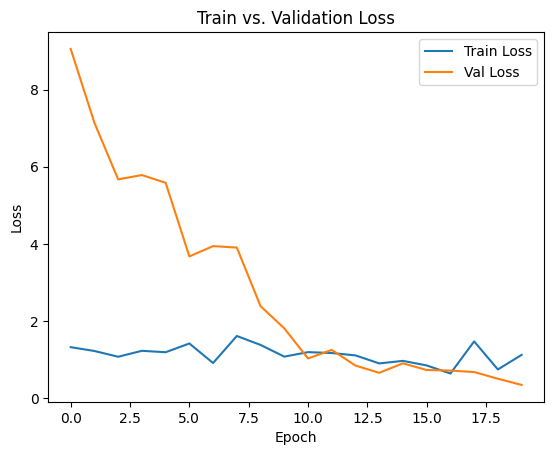

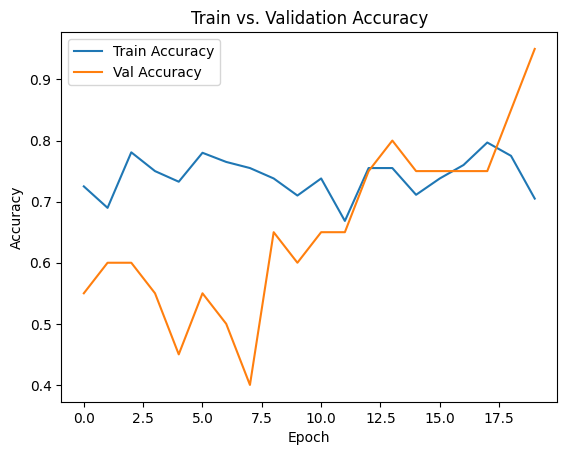

In [42]:
import matplotlib.pyplot as plt
# a. train vs validation loss over each epoch
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Train vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# b. train vs validation accuracy over each epoch
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Train vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [43]:
test_loss, test_accuracy = model.evaluate(X_test_final, y_test)
print("\n=====Results=====")
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)

3/3 [==============================] - 0s 33ms/step - loss: 0.4069 - accuracy: 0.8242

=====Results=====
Test Loss:  0.40685656666755676
Test Accuracy:  0.8241758346557617


In [58]:
X_test_final.shape

(32, 500, 500, 3)

In [59]:
print("Train loss: ", history.history['loss'])
print("Val loss: ", history.history['val_loss'])
print("Train acc: ", history.history['accuracy'])
print("Val acc: ", history.history['val_accuracy'])

Train loss:  [1.2918726205825806, 1.092654824256897, 1.1572725772857666, 0.835064709186554, 0.981141209602356, 1.1276119947433472, 0.8853039145469666, 0.908258855342865, 0.8082365989685059, 0.8257321119308472, 0.8201183080673218, 0.7132312059402466, 0.8778815865516663, 0.8641526699066162, 0.7207425236701965, 0.7515536546707153, 0.7843835353851318, 0.9017502069473267, 0.9158895611763, 0.8136439323425293]
Val loss:  [0.7100250720977783, 0.7181448340415955, 0.8236373662948608, 0.90376877784729, 1.096996545791626, 1.2177438735961914, 1.3336620330810547, 1.2182693481445312, 1.609422206878662, 1.705047369003296, 1.9834568500518799, 1.8888905048370361, 1.992143988609314, 1.701277256011963, 1.8770596981048584, 2.099928855895996, 2.146632671356201, 2.0826642513275146, 1.7396920919418335, 1.7950828075408936]
Train acc:  [0.6177605986595154, 0.6602316498756409, 0.6447876691818237, 0.6988416910171509, 0.7297297120094299, 0.6486486196517944, 0.7118055820465088, 0.7374517321586609, 0.725868701934814

In [30]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_images)
print(y_pred)

3/3 [==============================] - 0s 30ms/step
[[9.9294209e-01 7.0579043e-03]
 [9.5280308e-01 4.7196951e-02]
 [5.8280629e-01 4.1719371e-01]
 [8.9598563e-04 9.9910396e-01]
 [2.5640908e-03 9.9743599e-01]
 [1.1763894e-03 9.9882358e-01]
 [1.5549321e-01 8.4450674e-01]
 [2.3604428e-02 9.7639561e-01]
 [2.8633631e-03 9.9713659e-01]
 [9.8033398e-01 1.9665986e-02]
 [8.2208331e-05 9.9991775e-01]
 [1.2305629e-01 8.7694365e-01]
 [9.4806030e-04 9.9905199e-01]
 [8.7464956e-05 9.9991250e-01]
 [6.0210901e-01 3.9789099e-01]
 [3.6294267e-02 9.6370572e-01]
 [8.8417255e-05 9.9991155e-01]
 [2.0391919e-02 9.7960806e-01]
 [6.3173264e-02 9.3682677e-01]
 [6.8390375e-01 3.1609625e-01]
 [1.3746837e-01 8.6253160e-01]
 [1.5397528e-04 9.9984598e-01]
 [1.4955570e-02 9.8504448e-01]
 [2.7496502e-01 7.2503495e-01]
 [2.9796079e-01 7.0203918e-01]
 [7.7778757e-02 9.2222118e-01]
 [2.7221146e-01 7.2778851e-01]
 [2.6439877e-02 9.7356015e-01]
 [5.7340872e-01 4.2659131e-01]
 [4.4222265e-02 9.5577776e-01]
 [6.4061792e-03 9.